### Stock Price prediction on 10 Aug.

In [56]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from xgboost import XGBRegressor

import keras
from keras import layers

### Importing train and test(Sheet_1) datasets

In [4]:
train=pd.read_excel("Train_dataset.xlsx")
test=pd.read_excel('Test_dataset.xlsx')

#Creating a copy of the train and test datasets
c_test  = test.copy()
c_train  = train.copy()

### Getting information about train dataset

In [6]:
print(c_train.info())
c_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7383 entries, 0 to 7382
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stock Index           7383 non-null   object 
 1   Index                 7383 non-null   object 
 2   Industry              7383 non-null   object 
 3   VWAP                  7345 non-null   float64
 4   General Index         7321 non-null   float64
 5   NAV                   7322 non-null   float64
 6   P/E Ratio             7149 non-null   float64
 7   Volumes Traded        7115 non-null   float64
 8   Inventory Turnover    6984 non-null   float64
 9   Covid Impact (Beta)   7007 non-null   float64
 10  Tracking Error        7312 non-null   float64
 11  Dollar Exchange Rate  7306 non-null   float64
 12  Put-Call Ratio        7298 non-null   float64
 13  P/B Ratio             7358 non-null   float64
 14  Stock Price           7383 non-null   float64
dtypes: float64(12), objec

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


### Getting information about test dataset

In [8]:
print(c_test.info())
c_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3331 entries, 0 to 3330
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stock Index           3331 non-null   object 
 1   Index                 3331 non-null   object 
 2   Industry              3331 non-null   object 
 3   VWAP                  3319 non-null   float64
 4   General Index         3060 non-null   float64
 5   NAV                   3056 non-null   float64
 6   P/E Ratio             3039 non-null   float64
 7   Volumes Traded        3283 non-null   float64
 8   Inventory Turnover    3301 non-null   float64
 9   Covid Impact (Beta)   3300 non-null   float64
 10  Tracking Error        3205 non-null   float64
 11  Dollar Exchange Rate  3188 non-null   float64
 12  Put-Call Ratio        2902 non-null   float64
 13  P/B Ratio             3193 non-null   float64
dtypes: float64(11), object(3)
memory usage: 364.5+ KB
None


,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,AC3235,NSE,Materials,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66
1,AC3236,JSE,Energy,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11
2,AC3237,S&P 500,Information Tech,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99
3,AC3238,NSE,Healthcare,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26
4,AC3239,NYSE,Materials,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,NaN,6.18


1. Our target variable is Stock Price.
2. Stock Index is just an index.
3. We have many missing values
4. Index and Industry are categorical features otheres are numeric

### checking null values in both train and test dataset

In [10]:
c_train.isnull().sum().sort_values(ascending=False)

Inventory Turnover      399
Covid Impact (Beta)     376
Volumes Traded          268
P/E Ratio               234
Put-Call Ratio           85
Dollar Exchange Rate     77
Tracking Error           71
General Index            62
NAV                      61
VWAP                     38
P/B Ratio                25
Stock Price               0
Industry                  0
Index                     0
Stock Index               0
dtype: int64

In [11]:
c_test.isnull().sum().sort_values(ascending=False)

Put-Call Ratio          429
P/E Ratio               292
NAV                     275
General Index           271
Dollar Exchange Rate    143
P/B Ratio               138
Tracking Error          126
Volumes Traded           48
Covid Impact (Beta)      31
Inventory Turnover       30
VWAP                     12
Industry                  0
Index                     0
Stock Index               0
dtype: int64

### Now the next step is to encode categorical features

In [13]:
print('unique Industries:\n',c_train.Industry.unique())
Industries={'Real Estate':0,'Information Tech':1,'Materials':2,'Healthcare':3,'Energy':4 }

unique Industries:
 ['Real Estate' 'Information Tech' 'Materials' 'Healthcare' 'Energy']


In [14]:
print('unique Index name:\n',c_train.Index.unique())
Index={'NYSE':0,'BSE':1,'S&P 500':2,'NSE':3,'JSE':4}

unique Index name:
 ['NYSE' 'BSE' 'S&P 500' 'NSE' 'JSE']


In [15]:
c_train['Index']=c_train.Index.map(Index)
c_train['Industry']=c_train.Industry.map(Industries)
c_train=pd.get_dummies(c_train,prefix=['Index','Industry'],columns=['Index','Industry'],drop_first=True)


c_test['Index']=c_test.Index.map(Index)
c_test['Industry']=c_test.Industry.map(Industries)
c_test=pd.get_dummies(c_test,prefix=['Index','Industry'],columns=['Index','Industry'],drop_first=True)

In [16]:
c_train.head()

,Stock Index,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,...,P/B Ratio,Stock Price,Index_1,Index_2,Index_3,Index_4,Industry_1,Industry_2,Industry_3,Industry_4
0,AA1,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,...,9.20,156.987852,0,0,0,0,0,0,0,0
1,AA2,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,...,6.91,560.859622,0,0,0,0,1,0,0,0
2,AA3,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,...,6.09,1279.732874,0,0,0,0,1,0,0,0
3,AA4,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,...,5.60,1121.787632,1,0,0,0,0,1,0,0
4,AA5,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,...,9.46,382.962534,0,1,0,0,0,0,0,0


In [17]:
c_test.head()

,Stock Index,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Index_1,Index_2,Index_3,Index_4,Industry_1,Industry_2,Industry_3,Industry_4
0,AC3235,53.30,11270.15,44.59,185.09,12067855.0,2.78,0.03,0.0330,74.9,0.80,4.66,0,0,1,0,0,1,0,0
1,AC3236,749.34,55722.00,74.20,34.01,6172474.0,6.78,0.11,0.0464,17.7,0.86,6.11,0,0,0,1,0,0,0,1
2,AC3237,567.75,3351.28,88.41,177.40,17472488.0,4.36,0.23,0.0401,1.0,0.93,4.99,0,1,0,0,1,0,0,0
3,AC3238,646.78,11270.15,79.36,105.44,15553159.0,2.77,0.78,0.0187,74.9,1.09,1.26,0,0,1,0,0,0,1,0
4,AC3239,380.33,12765.84,19.90,139.40,12525784.0,5.93,0.03,0.0261,1.0,NaN,6.18,0,0,0,0,0,1,0,0


### Handling missing values
     xgboost is tree based method so it can handle missing values
     
     so we repalce NaN values of Covid Impact (Beta) by 999 and for other features we repalce it with -1

In [19]:
c_train['Covid Impact (Beta)'].fillna(999,inplace=True)
c_test['Covid Impact (Beta)'].fillna(999,inplace=True)

In [20]:
c_train.fillna(value=-1,inplace=True)
c_test.fillna(value=-1,inplace=True)

## Xgboost Model

In [22]:
xgb =XGBRegressor( booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1.5, n_estimators=2400,
             n_jobs=1, nthread=None,
             reg_alpha=0.6, reg_lambda=0.6, scale_pos_weight=1, 
             silent=None, subsample=0.8, verbosity=1)

In [23]:
c_train.drop('Stock Index',inplace=True,axis=1)

In [24]:
X=c_train.drop('Stock Price',axis=1)
y=c_train['Stock Price']
x_train,x_val,y_train,y_val=train_test_split(X,y,test_size=0.33,random_state=42)
x_train.shape

(4946, 19)

In [25]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=4,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=2400, n_jobs=1, nthread=1, num_parallel_tree=1,
             random_state=0, reg_alpha=0.6, reg_lambda=0.6, scale_pos_weight=1,
             silent=None, subsample=0.8, tree_method='exact',
             validate_parameters=1, verbosity=1)

In [26]:
predict=xgb.predict(x_val)

In [27]:
np.hstack((predict.reshape(-1,1),np.array(y_val).reshape(-1,1)))

array([[  72.85714722,   75.67870102],
       [ 112.39426422,  106.40847666],
       [ 440.65866089,  443.67879644],
       ...,
       [1036.80480957, 1079.59241009],
       [ 399.64154053,  415.30269241],
       [ 290.6965332 ,  285.874993  ]])

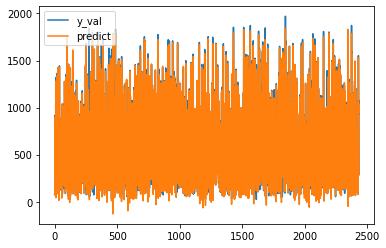

In [28]:
plt.plot(np.arange(0,len(y_val)),y_val,label='y_val')
plt.plot(np.arange(0,len(y_val)),predict,label='predict')
plt.legend()
plt.show()

In [29]:
print('RMSE',np.sqrt(np.sum((y_val-predict)**2)/y_val.shape[0]))

RMSE 76.90717332256062


### predication at test dataset

In [31]:
x_test=c_test.drop('Stock Index',axis=1)
x_test.shape

(3331, 19)

In [32]:
y_pred=xgb.predict(x_test)

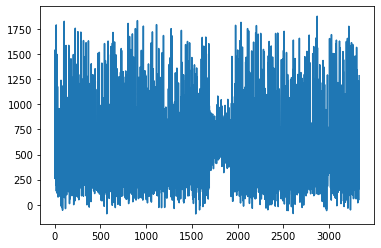

In [33]:
plt.plot(np.arange(0,len(y_pred)),y_pred)
plt.show()

In [34]:
out1=pd.concat([c_test['Stock Index'],pd.DataFrame(y_pred)],axis=1)
out1.columns=['Stock Index','Stock Price']
out1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3331 entries, 0 to 3330
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Stock Index  3331 non-null   object 
 1   Stock Price  3331 non-null   float32
dtypes: float32(1), object(1)
memory usage: 39.2+ KB


In [35]:
out1.to_csv('output file1(stock_price on 10 aug).csv',index=False)

### Stock Price prediction on 16 Aug.

    Time series Data ('Put-Call_TS' sheet)

    It is time series data so we build RNN model

In [37]:
test2=pd.read_excel('Test_dataset.xlsx',sheet_name='Put-Call_TS',names=['Stock Index','10 Aug','11 AUg','12 Aug','13 Aug','14 Aug','15 Aug'])
test2.dropna(axis=0,inplace=True)
test2.drop(['Stock Index'],axis=1,inplace=True)
test2.head()

,10 Aug,11 AUg,12 Aug,13 Aug,14 Aug,15 Aug
1,0.8,0.66,0.7724,0.983224,0.901211,0.898368
2,0.86,0.732,0.85448,1.08664,1.01704,1.02926
4,1.09,1.008,1.16912,1.48309,1.46106,1.531
7,1.23,1.176,1.36064,1.72441,1.73134,1.83641
8,1,0.9,1.046,1.32796,1.28732,1.33467


In [38]:
test2=np.array(test2)
X2=test2[:,0:-1].reshape(-1,5,1).astype('float64')
y2=test2[:,[-1]].astype('float64')

In [39]:
x_train2,x_val2,y_train2,y_val2=train_test_split(X2,y2,test_size=0.33,random_state=42)
x_train2.shape,x_train2.dtype

((1819, 5, 1), dtype('float64'))

In [40]:
inputs=keras.Input(shape=(5,1,))
x=layers.LSTM(128)(inputs)
outputs=layers.Dense(1,activation='linear')(x)
model=keras.Model(inputs=inputs,outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 5, 1)              0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer='adam',loss='mse')
model.fit(x_train2,y_train2,epochs=50,batch_size=64,validation_split=0.2,verbose=2)

Train on 1455 samples, validate on 364 samples
Epoch 1/50
 - 0s - loss: 0.4546 - val_loss: 0.0778
Epoch 2/50
 - 0s - loss: 0.0329 - val_loss: 0.0179
Epoch 3/50
 - 0s - loss: 0.0161 - val_loss: 0.0111
Epoch 4/50
 - 0s - loss: 0.0092 - val_loss: 0.0066
Epoch 5/50
 - 0s - loss: 0.0051 - val_loss: 0.0035
Epoch 6/50
 - 0s - loss: 0.0025 - val_loss: 0.0017
Epoch 7/50
 - 0s - loss: 0.0011 - val_loss: 7.6320e-04
Epoch 8/50
 - 0s - loss: 5.6325e-04 - val_loss: 4.6423e-04
Epoch 9/50
 - 0s - loss: 3.8571e-04 - val_loss: 3.6741e-04
Epoch 10/50
 - 0s - loss: 3.4066e-04 - val_loss: 3.4610e-04
Epoch 11/50
 - 0s - loss: 3.2943e-04 - val_loss: 3.3312e-04
Epoch 12/50
 - 0s - loss: 3.2913e-04 - val_loss: 3.2155e-04
Epoch 13/50
 - 0s - loss: 3.1651e-04 - val_loss: 3.1382e-04
Epoch 14/50
 - 0s - loss: 3.1120e-04 - val_loss: 3.0765e-04
Epoch 15/50
 - 0s - loss: 3.0310e-04 - val_loss: 3.0661e-04
Epoch 16/50
 - 0s - loss: 2.9828e-04 - val_loss: 2.9920e-04
Epoch 17/50
 - 0s - loss: 2.8948e-04 - val_loss: 2.851

In [42]:
np.hstack((model.predict(x_val2),y_val2))

array([[1.28403878, 1.29103639],
       [1.9312582 , 1.92366832],
       [0.82988584, 0.83292361],
       ...,
       [1.28403878, 1.29103639],
       [1.39487004, 1.40011086],
       [1.50629604, 1.50918533]])

In [43]:
model.evaluate(x_val2,y_val2)

896/896 [==============================] - 0s 60us/step


5.560187387995289e-05

## Predicting Put-Call Ratio on 16 aug

In [45]:
data=pd.read_excel('Test_dataset.xlsx',sheet_name='Put-Call_TS',names=['Stock Index','10 Aug','11 AUg','12 Aug','13 Aug','14 Aug','15 Aug'])
data=np.array(data)
data=data[1:,1:].astype('float64')
df=pd.DataFrame(data)
df.head()

,0,1,2,3,4,5
0,0.80,0.660,0.77240,0.983224,0.901211,0.898368
1,0.86,0.732,0.85448,1.086645,1.017042,1.029258
2,0.93,0.816,0.95024,1.207302,NaN,1.181962
3,1.09,1.008,1.16912,1.483091,1.461062,1.531000
4,NaN,1.104,1.27856,1.620986,1.615504,1.705519


In [46]:
# handling missing values

In [47]:
df.interpolate(axis=1,limit_direction='forward',inplace=True)
df.head()

,0,1,2,3,4,5
0,0.80,0.660,0.77240,0.983224,0.901211,0.898368
1,0.86,0.732,0.85448,1.086645,1.017042,1.029258
2,0.93,0.816,0.95024,1.207302,1.194632,1.181962
3,1.09,1.008,1.16912,1.483091,1.461062,1.531000
4,NaN,1.104,1.27856,1.620986,1.615504,1.705519


In [48]:
df=np.array(df)
X_arr=df[:,1:].reshape(-1,5,1)
X_arr.shape

(3331, 5, 1)

In [49]:
y_arr=model.predict(X_arr)
y_arr

array([[0.937559  ],
       [1.0891591 ],
       [1.2814497 ],
       ...,
       [0.6198351 ],
       [0.91256356],
       [0.7888945 ]], dtype=float32)

In [50]:
c_test['Put-Call Ratio']=y_arr


In [51]:
x_test2=c_test.drop('Stock Index',axis=1)
x_test2.shape

(3331, 19)

In [52]:
y_pred2=xgb.predict(x_test2)

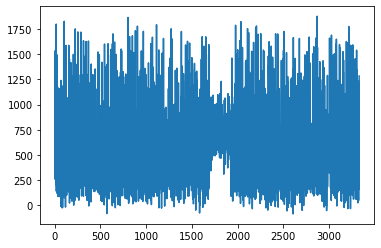

In [53]:
plt.plot(np.arange(0,len(y_pred2)),y_pred2)
plt.show()

In [54]:
out2=pd.concat([c_test['Stock Index'],pd.DataFrame(y_pred2)],axis=1)
out2.columns=['Stock Index','Stock Price']
out2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3331 entries, 0 to 3330
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Stock Index  3331 non-null   object 
 1   Stock Price  3331 non-null   float32
dtypes: float32(1), object(1)
memory usage: 39.2+ KB


In [55]:
out2.to_csv('output file2(stock_price on 16 aug).csv',index=False)